In [1]:
import numpy as np
import cupy as cp
import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('INFO')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

poppy_log.disabled = True

import warnings
warnings.filterwarnings("ignore")

import cgi_phasec_poppy as cgi
from cgi_phasec_poppy import misc

from wfsc import efc_1dm_broad as efc
from wfsc import pwp_1dm as pwp
from wfsc import utils

dm1_flat = 2*fits.getdata(cgi.data_dir/'dm-acts'/'flatmaps'/'hlc_flattened_dm1.fits')
dm2_flat = 2*fits.getdata(cgi.data_dir/'dm-acts'/'flatmaps'/'hlc_flattened_dm2.fits')


INFO:numexpr.utils:Note: detected 96 virtual cores but NumExpr set to maximum of 64, check "NUMEXPR_MAX_THREADS" environment variable.
INFO:numexpr.utils:Note: NumExpr detected 96 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


In [10]:
nwaves = 5
wavelength_c = 575e-9*u.m
bw = 0.1
wavelengths = np.linspace(wavelength_c*(1-bw/2), wavelength_c*(1+bw/2), nwaves)
wavelengths

<Quantity [5.46250e-07, 5.60625e-07, 5.75000e-07, 5.89375e-07, 6.03750e-07] m>

0.020183288964678355


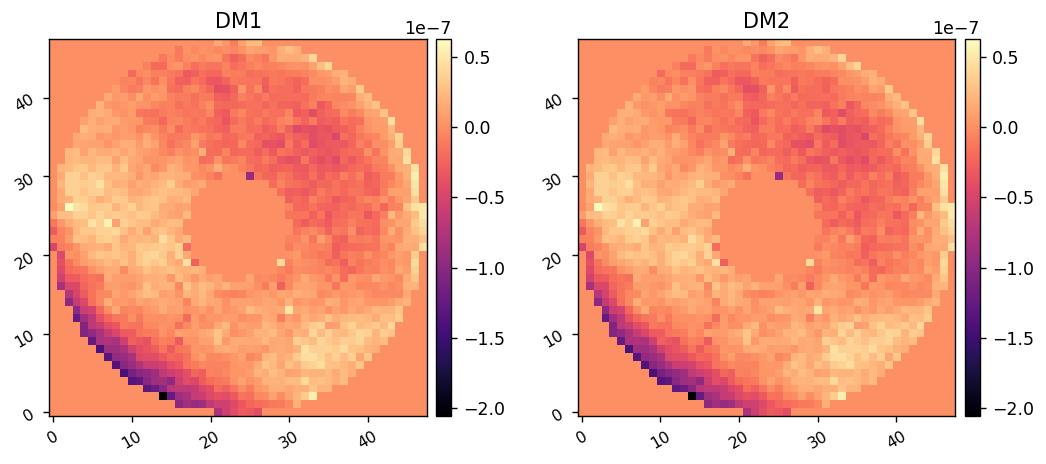

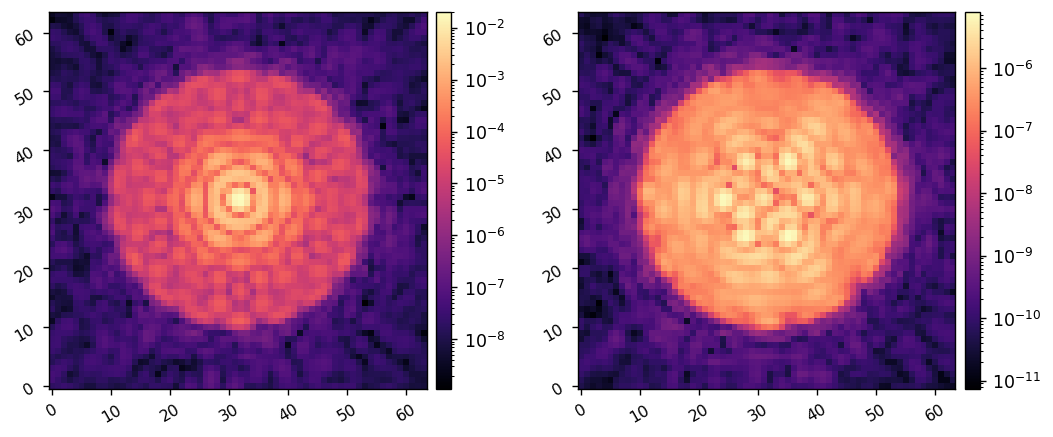

436


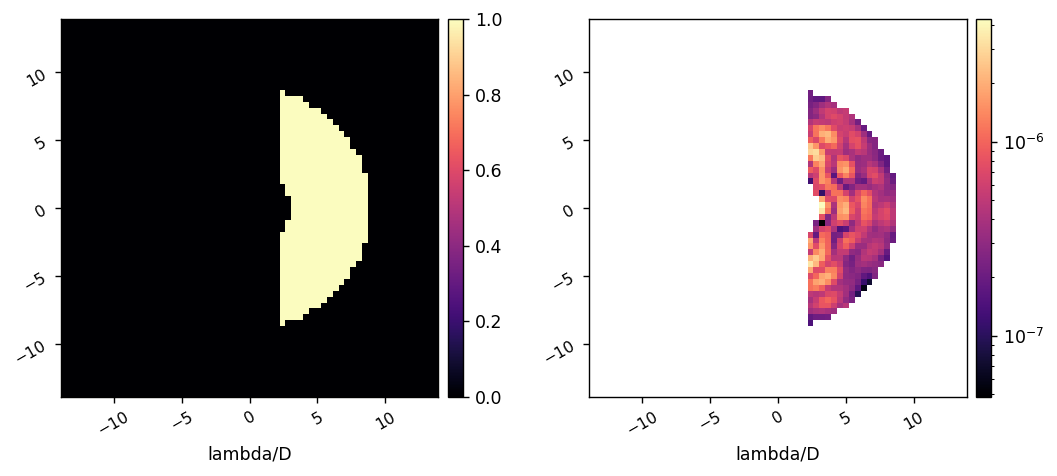

In [11]:
reload(cgi)
sys_unocc = cgi.CGI(cgi_mode='hlc', 
              use_fpm=False,
              use_pupil_defocus=False, 
              polaxis=0,
              use_opds=True,
              dm1_ref=dm1_flat, dm2_ref=dm2_flat,
             )

unocc_psf = 0
for wavelength in wavelengths:
    sys_unocc.wavelength = wavelength
    unocc_psf += sys_unocc.snap()/len(wavelengths)

Imax_unocc = unocc_psf.max()
print(Imax_unocc)

sys = cgi.CGI(cgi_mode='hlc', 
              use_fpm=True,
              use_pupil_defocus=False, 
              polaxis=0,
              use_opds=True,
              dm1_ref=dm1_flat, dm2_ref=dm2_flat,
             )

npsf = sys.npsf
Nact = sys.Nact

ref_psf = 0
for wavelength in wavelengths:
    sys.wavelength = wavelength
    ref_psf += sys.snap()/len(wavelengths)

sys.show_dms()
misc.myimshow2(unocc_psf, ref_psf, lognorm1=True, lognorm2=True)

reload(utils)
xfp = np.linspace(-0.5, 0.5, npsf) * npsf * sys.psf_pixelscale_lamD
xf,yf = np.meshgrid(xfp,xfp)

edge = 2
iwa = 3
owa = 9
rot = 0

# Create the mask that is used to select which region to make dark.
dh_params = {
    'inner_radius' : iwa,
    'outer_radius' : owa,
    'edge_position' : edge,
    'direction' : '+x',
    'rotation':rot,
    'full':False
}
dh_mask = utils.create_annular_focal_plane_mask(xf, yf, dh_params)

nmask = dh_mask.sum()
print(nmask)

misc.myimshow2(dh_mask, ref_psf*dh_mask,  
               pxscl1=sys.psf_pixelscale_lamD, pxscl2=sys.psf_pixelscale_lamD,
               lognorm2=True)

# Create/load Jacobian

In [17]:
reload(efc)

epsilon = 1e-9 # poke amplitudes (DM surface)
jac = efc.build_jacobian(sys, wavelengths, epsilon, dh_mask.flatten(), display=False)

Building Jacobian.
Calculating sensitivity for wavelength 5.606e-07 m
	Calculated response for mode 1/2304. Elapsed time=0.004 sec.
	Calculated response for mode 2/2304. Elapsed time=0.004 sec.
	Calculated response for mode 3/2304. Elapsed time=0.004 sec.
	Calculated response for mode 4/2304. Elapsed time=0.004 sec.
	Calculated response for mode 5/2304. Elapsed time=0.004 sec.
	Calculated response for mode 6/2304. Elapsed time=0.004 sec.
	Calculated response for mode 7/2304. Elapsed time=0.004 sec.
	Calculated response for mode 8/2304. Elapsed time=0.004 sec.
	Calculated response for mode 9/2304. Elapsed time=0.004 sec.
	Calculated response for mode 10/2304. Elapsed time=0.004 sec.
	Calculated response for mode 11/2304. Elapsed time=0.004 sec.
	Calculated response for mode 12/2304. Elapsed time=0.004 sec.
	Calculated response for mode 13/2304. Elapsed time=0.004 sec.
	Calculated response for mode 14/2304. Elapsed time=0.004 sec.
	Calculated response for mode 15/2304. Elapsed time=0.004

	Calculated response for mode 129/2304. Elapsed time=25.654 sec.
	Calculated response for mode 130/2304. Elapsed time=26.278 sec.
	Calculated response for mode 131/2304. Elapsed time=26.278 sec.
	Calculated response for mode 132/2304. Elapsed time=26.279 sec.
	Calculated response for mode 133/2304. Elapsed time=26.279 sec.
	Calculated response for mode 134/2304. Elapsed time=26.279 sec.
	Calculated response for mode 135/2304. Elapsed time=26.279 sec.
	Calculated response for mode 136/2304. Elapsed time=26.279 sec.
	Calculated response for mode 137/2304. Elapsed time=26.279 sec.
	Calculated response for mode 138/2304. Elapsed time=26.279 sec.
	Calculated response for mode 139/2304. Elapsed time=26.279 sec.
	Calculated response for mode 140/2304. Elapsed time=26.279 sec.
	Calculated response for mode 141/2304. Elapsed time=26.279 sec.
	Calculated response for mode 142/2304. Elapsed time=26.279 sec.
	Calculated response for mode 143/2304. Elapsed time=26.279 sec.
	Calculated response for 

	Calculated response for mode 256/2304. Elapsed time=63.430 sec.
	Calculated response for mode 257/2304. Elapsed time=64.055 sec.
	Calculated response for mode 258/2304. Elapsed time=64.679 sec.
	Calculated response for mode 259/2304. Elapsed time=65.305 sec.
	Calculated response for mode 260/2304. Elapsed time=65.931 sec.
	Calculated response for mode 261/2304. Elapsed time=66.563 sec.
	Calculated response for mode 262/2304. Elapsed time=67.188 sec.
	Calculated response for mode 263/2304. Elapsed time=67.812 sec.
	Calculated response for mode 264/2304. Elapsed time=68.439 sec.
	Calculated response for mode 265/2304. Elapsed time=69.065 sec.
	Calculated response for mode 266/2304. Elapsed time=69.689 sec.
	Calculated response for mode 267/2304. Elapsed time=70.316 sec.
	Calculated response for mode 268/2304. Elapsed time=70.942 sec.
	Calculated response for mode 269/2304. Elapsed time=71.577 sec.
	Calculated response for mode 270/2304. Elapsed time=72.202 sec.
	Calculated response for 

	Calculated response for mode 391/2304. Elapsed time=119.894 sec.
	Calculated response for mode 392/2304. Elapsed time=120.517 sec.
	Calculated response for mode 393/2304. Elapsed time=121.147 sec.
	Calculated response for mode 394/2304. Elapsed time=121.775 sec.
	Calculated response for mode 395/2304. Elapsed time=122.400 sec.
	Calculated response for mode 396/2304. Elapsed time=123.029 sec.
	Calculated response for mode 397/2304. Elapsed time=123.655 sec.
	Calculated response for mode 398/2304. Elapsed time=124.281 sec.
	Calculated response for mode 399/2304. Elapsed time=124.905 sec.
	Calculated response for mode 400/2304. Elapsed time=125.530 sec.
	Calculated response for mode 401/2304. Elapsed time=126.157 sec.
	Calculated response for mode 402/2304. Elapsed time=126.786 sec.
	Calculated response for mode 403/2304. Elapsed time=127.412 sec.
	Calculated response for mode 404/2304. Elapsed time=128.036 sec.
	Calculated response for mode 405/2304. Elapsed time=128.663 sec.
	Calculate

	Calculated response for mode 516/2304. Elapsed time=185.689 sec.
	Calculated response for mode 517/2304. Elapsed time=186.314 sec.
	Calculated response for mode 518/2304. Elapsed time=186.941 sec.
	Calculated response for mode 519/2304. Elapsed time=187.566 sec.
	Calculated response for mode 520/2304. Elapsed time=188.192 sec.
	Calculated response for mode 521/2304. Elapsed time=188.817 sec.
	Calculated response for mode 522/2304. Elapsed time=189.443 sec.
	Calculated response for mode 523/2304. Elapsed time=190.070 sec.
	Calculated response for mode 524/2304. Elapsed time=190.695 sec.
	Calculated response for mode 525/2304. Elapsed time=190.695 sec.
	Calculated response for mode 526/2304. Elapsed time=190.695 sec.
	Calculated response for mode 527/2304. Elapsed time=190.695 sec.
	Calculated response for mode 528/2304. Elapsed time=190.695 sec.
	Calculated response for mode 529/2304. Elapsed time=190.695 sec.
	Calculated response for mode 530/2304. Elapsed time=190.695 sec.
	Calculate

	Calculated response for mode 641/2304. Elapsed time=250.971 sec.
	Calculated response for mode 642/2304. Elapsed time=251.596 sec.
	Calculated response for mode 643/2304. Elapsed time=252.219 sec.
	Calculated response for mode 644/2304. Elapsed time=252.842 sec.
	Calculated response for mode 645/2304. Elapsed time=253.464 sec.
	Calculated response for mode 646/2304. Elapsed time=254.088 sec.
	Calculated response for mode 647/2304. Elapsed time=254.715 sec.
	Calculated response for mode 648/2304. Elapsed time=255.339 sec.
	Calculated response for mode 649/2304. Elapsed time=255.964 sec.
	Calculated response for mode 650/2304. Elapsed time=256.591 sec.
	Calculated response for mode 651/2304. Elapsed time=257.218 sec.
	Calculated response for mode 652/2304. Elapsed time=257.844 sec.
	Calculated response for mode 653/2304. Elapsed time=258.469 sec.
	Calculated response for mode 654/2304. Elapsed time=259.092 sec.
	Calculated response for mode 655/2304. Elapsed time=259.719 sec.
	Calculate

	Calculated response for mode 766/2304. Elapsed time=323.598 sec.
	Calculated response for mode 767/2304. Elapsed time=323.599 sec.
	Calculated response for mode 768/2304. Elapsed time=323.599 sec.
	Calculated response for mode 769/2304. Elapsed time=323.599 sec.
	Calculated response for mode 770/2304. Elapsed time=324.225 sec.
	Calculated response for mode 771/2304. Elapsed time=324.848 sec.
	Calculated response for mode 772/2304. Elapsed time=325.475 sec.
	Calculated response for mode 773/2304. Elapsed time=326.098 sec.
	Calculated response for mode 774/2304. Elapsed time=326.720 sec.
	Calculated response for mode 775/2304. Elapsed time=327.346 sec.
	Calculated response for mode 776/2304. Elapsed time=327.971 sec.
	Calculated response for mode 777/2304. Elapsed time=328.596 sec.
	Calculated response for mode 778/2304. Elapsed time=329.226 sec.
	Calculated response for mode 779/2304. Elapsed time=329.853 sec.
	Calculated response for mode 780/2304. Elapsed time=330.480 sec.
	Calculate

	Calculated response for mode 891/2304. Elapsed time=397.469 sec.
	Calculated response for mode 892/2304. Elapsed time=398.083 sec.
	Calculated response for mode 893/2304. Elapsed time=398.696 sec.
	Calculated response for mode 894/2304. Elapsed time=399.312 sec.
	Calculated response for mode 895/2304. Elapsed time=399.927 sec.
	Calculated response for mode 896/2304. Elapsed time=400.543 sec.
	Calculated response for mode 897/2304. Elapsed time=401.160 sec.
	Calculated response for mode 898/2304. Elapsed time=401.776 sec.
	Calculated response for mode 899/2304. Elapsed time=402.394 sec.
	Calculated response for mode 900/2304. Elapsed time=403.010 sec.
	Calculated response for mode 901/2304. Elapsed time=403.629 sec.
	Calculated response for mode 902/2304. Elapsed time=404.250 sec.
	Calculated response for mode 903/2304. Elapsed time=404.866 sec.
	Calculated response for mode 904/2304. Elapsed time=405.482 sec.
	Calculated response for mode 905/2304. Elapsed time=406.098 sec.
	Calculate

	Calculated response for mode 1015/2304. Elapsed time=471.602 sec.
	Calculated response for mode 1016/2304. Elapsed time=472.226 sec.
	Calculated response for mode 1017/2304. Elapsed time=472.856 sec.
	Calculated response for mode 1018/2304. Elapsed time=473.481 sec.
	Calculated response for mode 1019/2304. Elapsed time=474.106 sec.
	Calculated response for mode 1020/2304. Elapsed time=474.730 sec.
	Calculated response for mode 1021/2304. Elapsed time=475.356 sec.
	Calculated response for mode 1022/2304. Elapsed time=475.980 sec.
	Calculated response for mode 1023/2304. Elapsed time=476.600 sec.
	Calculated response for mode 1024/2304. Elapsed time=477.221 sec.
	Calculated response for mode 1025/2304. Elapsed time=477.845 sec.
	Calculated response for mode 1026/2304. Elapsed time=478.468 sec.
	Calculated response for mode 1027/2304. Elapsed time=479.096 sec.
	Calculated response for mode 1028/2304. Elapsed time=479.718 sec.
	Calculated response for mode 1029/2304. Elapsed time=480.344 

	Calculated response for mode 1138/2304. Elapsed time=548.747 sec.
	Calculated response for mode 1139/2304. Elapsed time=549.376 sec.
	Calculated response for mode 1140/2304. Elapsed time=550.002 sec.
	Calculated response for mode 1141/2304. Elapsed time=550.626 sec.
	Calculated response for mode 1142/2304. Elapsed time=551.252 sec.
	Calculated response for mode 1143/2304. Elapsed time=551.878 sec.
	Calculated response for mode 1144/2304. Elapsed time=552.504 sec.
	Calculated response for mode 1145/2304. Elapsed time=553.127 sec.
	Calculated response for mode 1146/2304. Elapsed time=553.756 sec.
	Calculated response for mode 1147/2304. Elapsed time=554.380 sec.
	Calculated response for mode 1148/2304. Elapsed time=555.003 sec.
	Calculated response for mode 1149/2304. Elapsed time=555.629 sec.
	Calculated response for mode 1150/2304. Elapsed time=556.249 sec.
	Calculated response for mode 1151/2304. Elapsed time=556.875 sec.
	Calculated response for mode 1152/2304. Elapsed time=557.498 

	Calculated response for mode 1261/2304. Elapsed time=625.684 sec.
	Calculated response for mode 1262/2304. Elapsed time=626.308 sec.
	Calculated response for mode 1263/2304. Elapsed time=626.929 sec.
	Calculated response for mode 1264/2304. Elapsed time=627.552 sec.
	Calculated response for mode 1265/2304. Elapsed time=628.178 sec.
	Calculated response for mode 1266/2304. Elapsed time=628.801 sec.
	Calculated response for mode 1267/2304. Elapsed time=629.424 sec.
	Calculated response for mode 1268/2304. Elapsed time=630.047 sec.
	Calculated response for mode 1269/2304. Elapsed time=630.671 sec.
	Calculated response for mode 1270/2304. Elapsed time=631.296 sec.
	Calculated response for mode 1271/2304. Elapsed time=631.921 sec.
	Calculated response for mode 1272/2304. Elapsed time=632.544 sec.
	Calculated response for mode 1273/2304. Elapsed time=633.168 sec.
	Calculated response for mode 1274/2304. Elapsed time=633.793 sec.
	Calculated response for mode 1275/2304. Elapsed time=634.417 

	Calculated response for mode 1384/2304. Elapsed time=700.903 sec.
	Calculated response for mode 1385/2304. Elapsed time=701.528 sec.
	Calculated response for mode 1386/2304. Elapsed time=702.154 sec.
	Calculated response for mode 1387/2304. Elapsed time=702.779 sec.
	Calculated response for mode 1388/2304. Elapsed time=703.403 sec.
	Calculated response for mode 1389/2304. Elapsed time=704.027 sec.
	Calculated response for mode 1390/2304. Elapsed time=704.653 sec.
	Calculated response for mode 1391/2304. Elapsed time=705.276 sec.
	Calculated response for mode 1392/2304. Elapsed time=705.276 sec.
	Calculated response for mode 1393/2304. Elapsed time=705.277 sec.
	Calculated response for mode 1394/2304. Elapsed time=705.904 sec.
	Calculated response for mode 1395/2304. Elapsed time=706.527 sec.
	Calculated response for mode 1396/2304. Elapsed time=707.151 sec.
	Calculated response for mode 1397/2304. Elapsed time=707.775 sec.
	Calculated response for mode 1398/2304. Elapsed time=708.399 

	Calculated response for mode 1507/2304. Elapsed time=773.864 sec.
	Calculated response for mode 1508/2304. Elapsed time=774.484 sec.
	Calculated response for mode 1509/2304. Elapsed time=775.108 sec.
	Calculated response for mode 1510/2304. Elapsed time=775.732 sec.
	Calculated response for mode 1511/2304. Elapsed time=776.357 sec.
	Calculated response for mode 1512/2304. Elapsed time=776.981 sec.
	Calculated response for mode 1513/2304. Elapsed time=777.606 sec.
	Calculated response for mode 1514/2304. Elapsed time=778.230 sec.
	Calculated response for mode 1515/2304. Elapsed time=778.853 sec.
	Calculated response for mode 1516/2304. Elapsed time=779.476 sec.
	Calculated response for mode 1517/2304. Elapsed time=780.099 sec.
	Calculated response for mode 1518/2304. Elapsed time=780.721 sec.
	Calculated response for mode 1519/2304. Elapsed time=781.342 sec.
	Calculated response for mode 1520/2304. Elapsed time=781.962 sec.
	Calculated response for mode 1521/2304. Elapsed time=782.587 

	Calculated response for mode 1630/2304. Elapsed time=846.557 sec.
	Calculated response for mode 1631/2304. Elapsed time=846.557 sec.
	Calculated response for mode 1632/2304. Elapsed time=846.558 sec.
	Calculated response for mode 1633/2304. Elapsed time=846.558 sec.
	Calculated response for mode 1634/2304. Elapsed time=846.558 sec.
	Calculated response for mode 1635/2304. Elapsed time=846.558 sec.
	Calculated response for mode 1636/2304. Elapsed time=847.185 sec.
	Calculated response for mode 1637/2304. Elapsed time=847.809 sec.
	Calculated response for mode 1638/2304. Elapsed time=848.432 sec.
	Calculated response for mode 1639/2304. Elapsed time=849.057 sec.
	Calculated response for mode 1640/2304. Elapsed time=849.678 sec.
	Calculated response for mode 1641/2304. Elapsed time=850.300 sec.
	Calculated response for mode 1642/2304. Elapsed time=850.922 sec.
	Calculated response for mode 1643/2304. Elapsed time=851.545 sec.
	Calculated response for mode 1644/2304. Elapsed time=852.167 

	Calculated response for mode 1753/2304. Elapsed time=912.048 sec.
	Calculated response for mode 1754/2304. Elapsed time=912.670 sec.
	Calculated response for mode 1755/2304. Elapsed time=913.289 sec.
	Calculated response for mode 1756/2304. Elapsed time=913.987 sec.
	Calculated response for mode 1757/2304. Elapsed time=914.610 sec.
	Calculated response for mode 1758/2304. Elapsed time=915.232 sec.
	Calculated response for mode 1759/2304. Elapsed time=915.855 sec.
	Calculated response for mode 1760/2304. Elapsed time=916.479 sec.
	Calculated response for mode 1761/2304. Elapsed time=917.103 sec.
	Calculated response for mode 1762/2304. Elapsed time=917.725 sec.
	Calculated response for mode 1763/2304. Elapsed time=918.352 sec.
	Calculated response for mode 1764/2304. Elapsed time=918.978 sec.
	Calculated response for mode 1765/2304. Elapsed time=919.599 sec.
	Calculated response for mode 1766/2304. Elapsed time=920.223 sec.
	Calculated response for mode 1767/2304. Elapsed time=920.847 

	Calculated response for mode 1879/2304. Elapsed time=973.319 sec.
	Calculated response for mode 1880/2304. Elapsed time=973.941 sec.
	Calculated response for mode 1881/2304. Elapsed time=974.566 sec.
	Calculated response for mode 1882/2304. Elapsed time=975.192 sec.
	Calculated response for mode 1883/2304. Elapsed time=975.813 sec.
	Calculated response for mode 1884/2304. Elapsed time=976.435 sec.
	Calculated response for mode 1885/2304. Elapsed time=977.061 sec.
	Calculated response for mode 1886/2304. Elapsed time=977.683 sec.
	Calculated response for mode 1887/2304. Elapsed time=978.303 sec.
	Calculated response for mode 1888/2304. Elapsed time=978.926 sec.
	Calculated response for mode 1889/2304. Elapsed time=979.550 sec.
	Calculated response for mode 1890/2304. Elapsed time=980.171 sec.
	Calculated response for mode 1891/2304. Elapsed time=980.793 sec.
	Calculated response for mode 1892/2304. Elapsed time=981.413 sec.
	Calculated response for mode 1893/2304. Elapsed time=982.035 

	Calculated response for mode 2001/2304. Elapsed time=1031.817 sec.
	Calculated response for mode 2002/2304. Elapsed time=1032.439 sec.
	Calculated response for mode 2003/2304. Elapsed time=1033.060 sec.
	Calculated response for mode 2004/2304. Elapsed time=1033.684 sec.
	Calculated response for mode 2005/2304. Elapsed time=1034.304 sec.
	Calculated response for mode 2006/2304. Elapsed time=1034.925 sec.
	Calculated response for mode 2007/2304. Elapsed time=1035.547 sec.
	Calculated response for mode 2008/2304. Elapsed time=1036.169 sec.
	Calculated response for mode 2009/2304. Elapsed time=1036.170 sec.
	Calculated response for mode 2010/2304. Elapsed time=1036.170 sec.
	Calculated response for mode 2011/2304. Elapsed time=1036.170 sec.
	Calculated response for mode 2012/2304. Elapsed time=1036.170 sec.
	Calculated response for mode 2013/2304. Elapsed time=1036.170 sec.
	Calculated response for mode 2014/2304. Elapsed time=1036.170 sec.
	Calculated response for mode 2015/2304. Elapsed

	Calculated response for mode 2125/2304. Elapsed time=1072.960 sec.
	Calculated response for mode 2126/2304. Elapsed time=1073.581 sec.
	Calculated response for mode 2127/2304. Elapsed time=1074.202 sec.
	Calculated response for mode 2128/2304. Elapsed time=1074.824 sec.
	Calculated response for mode 2129/2304. Elapsed time=1075.444 sec.
	Calculated response for mode 2130/2304. Elapsed time=1076.068 sec.
	Calculated response for mode 2131/2304. Elapsed time=1076.691 sec.
	Calculated response for mode 2132/2304. Elapsed time=1077.314 sec.
	Calculated response for mode 2133/2304. Elapsed time=1077.937 sec.
	Calculated response for mode 2134/2304. Elapsed time=1078.559 sec.
	Calculated response for mode 2135/2304. Elapsed time=1079.180 sec.
	Calculated response for mode 2136/2304. Elapsed time=1079.807 sec.
	Calculated response for mode 2137/2304. Elapsed time=1080.431 sec.
	Calculated response for mode 2138/2304. Elapsed time=1081.055 sec.
	Calculated response for mode 2139/2304. Elapsed

	Calculated response for mode 2278/2304. Elapsed time=1110.410 sec.
	Calculated response for mode 2279/2304. Elapsed time=1111.030 sec.
	Calculated response for mode 2280/2304. Elapsed time=1111.649 sec.
	Calculated response for mode 2281/2304. Elapsed time=1112.269 sec.
	Calculated response for mode 2282/2304. Elapsed time=1112.890 sec.
	Calculated response for mode 2283/2304. Elapsed time=1113.511 sec.
	Calculated response for mode 2284/2304. Elapsed time=1113.511 sec.
	Calculated response for mode 2285/2304. Elapsed time=1113.511 sec.
	Calculated response for mode 2286/2304. Elapsed time=1113.511 sec.
	Calculated response for mode 2287/2304. Elapsed time=1113.511 sec.
	Calculated response for mode 2288/2304. Elapsed time=1113.511 sec.
	Calculated response for mode 2289/2304. Elapsed time=1113.511 sec.
	Calculated response for mode 2290/2304. Elapsed time=1113.511 sec.
	Calculated response for mode 2291/2304. Elapsed time=1113.511 sec.
	Calculated response for mode 2292/2304. Elapsed

	Calculated response for mode 111/2304. Elapsed time=1127.783 sec.
	Calculated response for mode 112/2304. Elapsed time=1128.403 sec.
	Calculated response for mode 113/2304. Elapsed time=1129.022 sec.
	Calculated response for mode 114/2304. Elapsed time=1129.642 sec.
	Calculated response for mode 115/2304. Elapsed time=1130.261 sec.
	Calculated response for mode 116/2304. Elapsed time=1130.884 sec.
	Calculated response for mode 117/2304. Elapsed time=1131.504 sec.
	Calculated response for mode 118/2304. Elapsed time=1132.126 sec.
	Calculated response for mode 119/2304. Elapsed time=1132.747 sec.
	Calculated response for mode 120/2304. Elapsed time=1133.372 sec.
	Calculated response for mode 121/2304. Elapsed time=1133.994 sec.
	Calculated response for mode 122/2304. Elapsed time=1134.614 sec.
	Calculated response for mode 123/2304. Elapsed time=1135.237 sec.
	Calculated response for mode 124/2304. Elapsed time=1135.983 sec.
	Calculated response for mode 125/2304. Elapsed time=1136.607 

	Calculated response for mode 250/2304. Elapsed time=1172.675 sec.
	Calculated response for mode 251/2304. Elapsed time=1173.299 sec.
	Calculated response for mode 252/2304. Elapsed time=1173.920 sec.
	Calculated response for mode 253/2304. Elapsed time=1174.543 sec.
	Calculated response for mode 254/2304. Elapsed time=1175.167 sec.
	Calculated response for mode 255/2304. Elapsed time=1175.788 sec.
	Calculated response for mode 256/2304. Elapsed time=1176.411 sec.
	Calculated response for mode 257/2304. Elapsed time=1177.036 sec.
	Calculated response for mode 258/2304. Elapsed time=1177.659 sec.
	Calculated response for mode 259/2304. Elapsed time=1178.281 sec.
	Calculated response for mode 260/2304. Elapsed time=1178.904 sec.
	Calculated response for mode 261/2304. Elapsed time=1179.525 sec.
	Calculated response for mode 262/2304. Elapsed time=1180.147 sec.
	Calculated response for mode 263/2304. Elapsed time=1180.769 sec.
	Calculated response for mode 264/2304. Elapsed time=1181.390 

	Calculated response for mode 373/2304. Elapsed time=1229.443 sec.
	Calculated response for mode 374/2304. Elapsed time=1230.067 sec.
	Calculated response for mode 375/2304. Elapsed time=1230.690 sec.
	Calculated response for mode 376/2304. Elapsed time=1231.313 sec.
	Calculated response for mode 377/2304. Elapsed time=1231.933 sec.
	Calculated response for mode 378/2304. Elapsed time=1231.933 sec.
	Calculated response for mode 379/2304. Elapsed time=1231.933 sec.
	Calculated response for mode 380/2304. Elapsed time=1231.933 sec.
	Calculated response for mode 381/2304. Elapsed time=1231.933 sec.
	Calculated response for mode 382/2304. Elapsed time=1231.933 sec.
	Calculated response for mode 383/2304. Elapsed time=1231.933 sec.
	Calculated response for mode 384/2304. Elapsed time=1231.933 sec.
	Calculated response for mode 385/2304. Elapsed time=1231.933 sec.
	Calculated response for mode 386/2304. Elapsed time=1231.933 sec.
	Calculated response for mode 387/2304. Elapsed time=1231.933 

	Calculated response for mode 496/2304. Elapsed time=1285.592 sec.
	Calculated response for mode 497/2304. Elapsed time=1286.216 sec.
	Calculated response for mode 498/2304. Elapsed time=1286.959 sec.
	Calculated response for mode 499/2304. Elapsed time=1287.580 sec.
	Calculated response for mode 500/2304. Elapsed time=1288.204 sec.
	Calculated response for mode 501/2304. Elapsed time=1288.824 sec.
	Calculated response for mode 502/2304. Elapsed time=1289.446 sec.
	Calculated response for mode 503/2304. Elapsed time=1290.069 sec.
	Calculated response for mode 504/2304. Elapsed time=1290.690 sec.
	Calculated response for mode 505/2304. Elapsed time=1291.312 sec.
	Calculated response for mode 506/2304. Elapsed time=1291.935 sec.
	Calculated response for mode 507/2304. Elapsed time=1292.557 sec.
	Calculated response for mode 508/2304. Elapsed time=1293.179 sec.
	Calculated response for mode 509/2304. Elapsed time=1293.803 sec.
	Calculated response for mode 510/2304. Elapsed time=1294.425 

	Calculated response for mode 619/2304. Elapsed time=1353.030 sec.
	Calculated response for mode 620/2304. Elapsed time=1353.653 sec.
	Calculated response for mode 621/2304. Elapsed time=1354.272 sec.
	Calculated response for mode 622/2304. Elapsed time=1354.273 sec.
	Calculated response for mode 623/2304. Elapsed time=1354.273 sec.
	Calculated response for mode 624/2304. Elapsed time=1354.273 sec.
	Calculated response for mode 625/2304. Elapsed time=1354.273 sec.
	Calculated response for mode 626/2304. Elapsed time=1354.273 sec.
	Calculated response for mode 627/2304. Elapsed time=1354.273 sec.
	Calculated response for mode 628/2304. Elapsed time=1354.894 sec.
	Calculated response for mode 629/2304. Elapsed time=1355.518 sec.
	Calculated response for mode 630/2304. Elapsed time=1356.142 sec.
	Calculated response for mode 631/2304. Elapsed time=1356.764 sec.
	Calculated response for mode 632/2304. Elapsed time=1357.384 sec.
	Calculated response for mode 633/2304. Elapsed time=1358.004 

	Calculated response for mode 742/2304. Elapsed time=1420.208 sec.
	Calculated response for mode 743/2304. Elapsed time=1420.827 sec.
	Calculated response for mode 744/2304. Elapsed time=1421.446 sec.
	Calculated response for mode 745/2304. Elapsed time=1422.067 sec.
	Calculated response for mode 746/2304. Elapsed time=1422.687 sec.
	Calculated response for mode 747/2304. Elapsed time=1423.306 sec.
	Calculated response for mode 748/2304. Elapsed time=1423.926 sec.
	Calculated response for mode 749/2304. Elapsed time=1424.546 sec.
	Calculated response for mode 750/2304. Elapsed time=1425.166 sec.
	Calculated response for mode 751/2304. Elapsed time=1425.788 sec.
	Calculated response for mode 752/2304. Elapsed time=1426.413 sec.
	Calculated response for mode 753/2304. Elapsed time=1427.034 sec.
	Calculated response for mode 754/2304. Elapsed time=1427.656 sec.
	Calculated response for mode 755/2304. Elapsed time=1428.278 sec.
	Calculated response for mode 756/2304. Elapsed time=1428.897 

	Calculated response for mode 866/2304. Elapsed time=1493.072 sec.
	Calculated response for mode 867/2304. Elapsed time=1493.696 sec.
	Calculated response for mode 868/2304. Elapsed time=1494.317 sec.
	Calculated response for mode 869/2304. Elapsed time=1494.939 sec.
	Calculated response for mode 870/2304. Elapsed time=1495.564 sec.
	Calculated response for mode 871/2304. Elapsed time=1496.186 sec.
	Calculated response for mode 872/2304. Elapsed time=1496.807 sec.
	Calculated response for mode 873/2304. Elapsed time=1497.431 sec.
	Calculated response for mode 874/2304. Elapsed time=1498.055 sec.
	Calculated response for mode 875/2304. Elapsed time=1498.673 sec.
	Calculated response for mode 876/2304. Elapsed time=1499.296 sec.
	Calculated response for mode 877/2304. Elapsed time=1500.033 sec.
	Calculated response for mode 878/2304. Elapsed time=1500.654 sec.
	Calculated response for mode 879/2304. Elapsed time=1501.274 sec.
	Calculated response for mode 880/2304. Elapsed time=1501.888 

	Calculated response for mode 989/2304. Elapsed time=1567.194 sec.
	Calculated response for mode 990/2304. Elapsed time=1567.818 sec.
	Calculated response for mode 991/2304. Elapsed time=1568.439 sec.
	Calculated response for mode 992/2304. Elapsed time=1569.060 sec.
	Calculated response for mode 993/2304. Elapsed time=1569.682 sec.
	Calculated response for mode 994/2304. Elapsed time=1570.304 sec.
	Calculated response for mode 995/2304. Elapsed time=1570.926 sec.
	Calculated response for mode 996/2304. Elapsed time=1571.548 sec.
	Calculated response for mode 997/2304. Elapsed time=1572.169 sec.
	Calculated response for mode 998/2304. Elapsed time=1572.903 sec.
	Calculated response for mode 999/2304. Elapsed time=1573.523 sec.
	Calculated response for mode 1000/2304. Elapsed time=1574.143 sec.
	Calculated response for mode 1001/2304. Elapsed time=1574.762 sec.
	Calculated response for mode 1002/2304. Elapsed time=1575.381 sec.
	Calculated response for mode 1003/2304. Elapsed time=1576.

	Calculated response for mode 1110/2304. Elapsed time=1644.049 sec.
	Calculated response for mode 1111/2304. Elapsed time=1644.671 sec.
	Calculated response for mode 1112/2304. Elapsed time=1645.295 sec.
	Calculated response for mode 1113/2304. Elapsed time=1645.915 sec.
	Calculated response for mode 1114/2304. Elapsed time=1646.536 sec.
	Calculated response for mode 1115/2304. Elapsed time=1647.154 sec.
	Calculated response for mode 1116/2304. Elapsed time=1647.775 sec.
	Calculated response for mode 1117/2304. Elapsed time=1648.396 sec.
	Calculated response for mode 1118/2304. Elapsed time=1649.017 sec.
	Calculated response for mode 1119/2304. Elapsed time=1649.637 sec.
	Calculated response for mode 1120/2304. Elapsed time=1650.257 sec.
	Calculated response for mode 1121/2304. Elapsed time=1650.878 sec.
	Calculated response for mode 1122/2304. Elapsed time=1651.501 sec.
	Calculated response for mode 1123/2304. Elapsed time=1652.123 sec.
	Calculated response for mode 1124/2304. Elapsed

	Calculated response for mode 1231/2304. Elapsed time=1719.387 sec.
	Calculated response for mode 1232/2304. Elapsed time=1720.006 sec.
	Calculated response for mode 1233/2304. Elapsed time=1720.624 sec.
	Calculated response for mode 1234/2304. Elapsed time=1721.245 sec.
	Calculated response for mode 1235/2304. Elapsed time=1721.866 sec.
	Calculated response for mode 1236/2304. Elapsed time=1722.489 sec.
	Calculated response for mode 1237/2304. Elapsed time=1723.110 sec.
	Calculated response for mode 1238/2304. Elapsed time=1723.734 sec.
	Calculated response for mode 1239/2304. Elapsed time=1724.359 sec.
	Calculated response for mode 1240/2304. Elapsed time=1724.979 sec.
	Calculated response for mode 1241/2304. Elapsed time=1725.600 sec.
	Calculated response for mode 1242/2304. Elapsed time=1726.222 sec.
	Calculated response for mode 1243/2304. Elapsed time=1726.847 sec.
	Calculated response for mode 1244/2304. Elapsed time=1727.472 sec.
	Calculated response for mode 1245/2304. Elapsed

	Calculated response for mode 1352/2304. Elapsed time=1793.095 sec.
	Calculated response for mode 1353/2304. Elapsed time=1793.718 sec.
	Calculated response for mode 1354/2304. Elapsed time=1794.341 sec.
	Calculated response for mode 1355/2304. Elapsed time=1794.965 sec.
	Calculated response for mode 1356/2304. Elapsed time=1795.591 sec.
	Calculated response for mode 1357/2304. Elapsed time=1796.213 sec.
	Calculated response for mode 1358/2304. Elapsed time=1796.834 sec.
	Calculated response for mode 1359/2304. Elapsed time=1797.454 sec.
	Calculated response for mode 1360/2304. Elapsed time=1798.075 sec.
	Calculated response for mode 1361/2304. Elapsed time=1798.699 sec.
	Calculated response for mode 1362/2304. Elapsed time=1799.321 sec.
	Calculated response for mode 1363/2304. Elapsed time=1799.945 sec.
	Calculated response for mode 1364/2304. Elapsed time=1800.568 sec.
	Calculated response for mode 1365/2304. Elapsed time=1801.190 sec.
	Calculated response for mode 1366/2304. Elapsed

	Calculated response for mode 1473/2304. Elapsed time=1866.213 sec.
	Calculated response for mode 1474/2304. Elapsed time=1866.837 sec.
	Calculated response for mode 1475/2304. Elapsed time=1867.459 sec.
	Calculated response for mode 1476/2304. Elapsed time=1868.082 sec.
	Calculated response for mode 1477/2304. Elapsed time=1868.703 sec.
	Calculated response for mode 1478/2304. Elapsed time=1869.325 sec.
	Calculated response for mode 1479/2304. Elapsed time=1869.953 sec.
	Calculated response for mode 1480/2304. Elapsed time=1870.580 sec.
	Calculated response for mode 1481/2304. Elapsed time=1871.204 sec.
	Calculated response for mode 1482/2304. Elapsed time=1871.832 sec.
	Calculated response for mode 1483/2304. Elapsed time=1872.455 sec.
	Calculated response for mode 1484/2304. Elapsed time=1873.082 sec.
	Calculated response for mode 1485/2304. Elapsed time=1873.710 sec.
	Calculated response for mode 1486/2304. Elapsed time=1874.337 sec.
	Calculated response for mode 1487/2304. Elapsed

	Calculated response for mode 1594/2304. Elapsed time=1936.220 sec.
	Calculated response for mode 1595/2304. Elapsed time=1936.845 sec.
	Calculated response for mode 1596/2304. Elapsed time=1937.467 sec.
	Calculated response for mode 1597/2304. Elapsed time=1938.087 sec.
	Calculated response for mode 1598/2304. Elapsed time=1938.713 sec.
	Calculated response for mode 1599/2304. Elapsed time=1939.333 sec.
	Calculated response for mode 1600/2304. Elapsed time=1939.956 sec.
	Calculated response for mode 1601/2304. Elapsed time=1940.577 sec.
	Calculated response for mode 1602/2304. Elapsed time=1941.199 sec.
	Calculated response for mode 1603/2304. Elapsed time=1941.827 sec.
	Calculated response for mode 1604/2304. Elapsed time=1942.448 sec.
	Calculated response for mode 1605/2304. Elapsed time=1943.070 sec.
	Calculated response for mode 1606/2304. Elapsed time=1943.692 sec.
	Calculated response for mode 1607/2304. Elapsed time=1944.314 sec.
	Calculated response for mode 1608/2304. Elapsed

	Calculated response for mode 1715/2304. Elapsed time=2004.863 sec.
	Calculated response for mode 1716/2304. Elapsed time=2005.483 sec.
	Calculated response for mode 1717/2304. Elapsed time=2006.104 sec.
	Calculated response for mode 1718/2304. Elapsed time=2006.725 sec.
	Calculated response for mode 1719/2304. Elapsed time=2007.346 sec.
	Calculated response for mode 1720/2304. Elapsed time=2007.967 sec.
	Calculated response for mode 1721/2304. Elapsed time=2008.593 sec.
	Calculated response for mode 1722/2304. Elapsed time=2009.212 sec.
	Calculated response for mode 1723/2304. Elapsed time=2009.833 sec.
	Calculated response for mode 1724/2304. Elapsed time=2010.453 sec.
	Calculated response for mode 1725/2304. Elapsed time=2011.072 sec.
	Calculated response for mode 1726/2304. Elapsed time=2011.072 sec.
	Calculated response for mode 1727/2304. Elapsed time=2011.072 sec.
	Calculated response for mode 1728/2304. Elapsed time=2011.072 sec.
	Calculated response for mode 1729/2304. Elapsed

	Calculated response for mode 1836/2304. Elapsed time=2065.280 sec.
	Calculated response for mode 1837/2304. Elapsed time=2065.905 sec.
	Calculated response for mode 1838/2304. Elapsed time=2066.527 sec.
	Calculated response for mode 1839/2304. Elapsed time=2067.149 sec.
	Calculated response for mode 1840/2304. Elapsed time=2067.769 sec.
	Calculated response for mode 1841/2304. Elapsed time=2068.391 sec.
	Calculated response for mode 1842/2304. Elapsed time=2069.010 sec.
	Calculated response for mode 1843/2304. Elapsed time=2069.630 sec.
	Calculated response for mode 1844/2304. Elapsed time=2070.251 sec.
	Calculated response for mode 1845/2304. Elapsed time=2070.871 sec.
	Calculated response for mode 1846/2304. Elapsed time=2071.492 sec.
	Calculated response for mode 1847/2304. Elapsed time=2072.113 sec.
	Calculated response for mode 1848/2304. Elapsed time=2072.732 sec.
	Calculated response for mode 1849/2304. Elapsed time=2073.357 sec.
	Calculated response for mode 1850/2304. Elapsed

	Calculated response for mode 1957/2304. Elapsed time=2125.636 sec.
	Calculated response for mode 1958/2304. Elapsed time=2126.254 sec.
	Calculated response for mode 1959/2304. Elapsed time=2126.875 sec.
	Calculated response for mode 1960/2304. Elapsed time=2127.495 sec.
	Calculated response for mode 1961/2304. Elapsed time=2128.117 sec.
	Calculated response for mode 1962/2304. Elapsed time=2128.117 sec.
	Calculated response for mode 1963/2304. Elapsed time=2128.117 sec.
	Calculated response for mode 1964/2304. Elapsed time=2128.117 sec.
	Calculated response for mode 1965/2304. Elapsed time=2128.117 sec.
	Calculated response for mode 1966/2304. Elapsed time=2128.117 sec.
	Calculated response for mode 1967/2304. Elapsed time=2128.117 sec.
	Calculated response for mode 1968/2304. Elapsed time=2128.117 sec.
	Calculated response for mode 1969/2304. Elapsed time=2128.117 sec.
	Calculated response for mode 1970/2304. Elapsed time=2128.117 sec.
	Calculated response for mode 1971/2304. Elapsed

	Calculated response for mode 2078/2304. Elapsed time=2169.382 sec.
	Calculated response for mode 2079/2304. Elapsed time=2169.995 sec.
	Calculated response for mode 2080/2304. Elapsed time=2170.609 sec.
	Calculated response for mode 2081/2304. Elapsed time=2171.221 sec.
	Calculated response for mode 2082/2304. Elapsed time=2171.834 sec.
	Calculated response for mode 2083/2304. Elapsed time=2172.446 sec.
	Calculated response for mode 2084/2304. Elapsed time=2173.074 sec.
	Calculated response for mode 2085/2304. Elapsed time=2173.687 sec.
	Calculated response for mode 2086/2304. Elapsed time=2174.301 sec.
	Calculated response for mode 2087/2304. Elapsed time=2174.912 sec.
	Calculated response for mode 2088/2304. Elapsed time=2175.523 sec.
	Calculated response for mode 2089/2304. Elapsed time=2176.136 sec.
	Calculated response for mode 2090/2304. Elapsed time=2176.970 sec.
	Calculated response for mode 2091/2304. Elapsed time=2177.582 sec.
	Calculated response for mode 2092/2304. Elapsed

	Calculated response for mode 2225/2304. Elapsed time=2212.195 sec.
	Calculated response for mode 2226/2304. Elapsed time=2212.813 sec.
	Calculated response for mode 2227/2304. Elapsed time=2213.431 sec.
	Calculated response for mode 2228/2304. Elapsed time=2214.050 sec.
	Calculated response for mode 2229/2304. Elapsed time=2214.666 sec.
	Calculated response for mode 2230/2304. Elapsed time=2215.284 sec.
	Calculated response for mode 2231/2304. Elapsed time=2215.904 sec.
	Calculated response for mode 2232/2304. Elapsed time=2216.521 sec.
	Calculated response for mode 2233/2304. Elapsed time=2217.138 sec.
	Calculated response for mode 2234/2304. Elapsed time=2217.760 sec.
	Calculated response for mode 2235/2304. Elapsed time=2218.376 sec.
	Calculated response for mode 2236/2304. Elapsed time=2218.995 sec.
	Calculated response for mode 2237/2304. Elapsed time=2219.613 sec.
	Calculated response for mode 2238/2304. Elapsed time=2220.233 sec.
	Calculated response for mode 2239/2304. Elapsed

	Calculated response for mode 65/2304. Elapsed time=2229.534 sec.
	Calculated response for mode 66/2304. Elapsed time=2230.152 sec.
	Calculated response for mode 67/2304. Elapsed time=2230.772 sec.
	Calculated response for mode 68/2304. Elapsed time=2231.394 sec.
	Calculated response for mode 69/2304. Elapsed time=2232.014 sec.
	Calculated response for mode 70/2304. Elapsed time=2232.637 sec.
	Calculated response for mode 71/2304. Elapsed time=2233.366 sec.
	Calculated response for mode 72/2304. Elapsed time=2233.988 sec.
	Calculated response for mode 73/2304. Elapsed time=2234.605 sec.
	Calculated response for mode 74/2304. Elapsed time=2235.227 sec.
	Calculated response for mode 75/2304. Elapsed time=2235.846 sec.
	Calculated response for mode 76/2304. Elapsed time=2236.467 sec.
	Calculated response for mode 77/2304. Elapsed time=2237.085 sec.
	Calculated response for mode 78/2304. Elapsed time=2237.705 sec.
	Calculated response for mode 79/2304. Elapsed time=2238.325 sec.
	Calculate

	Calculated response for mode 203/2304. Elapsed time=2266.941 sec.
	Calculated response for mode 204/2304. Elapsed time=2267.559 sec.
	Calculated response for mode 205/2304. Elapsed time=2268.179 sec.
	Calculated response for mode 206/2304. Elapsed time=2268.799 sec.
	Calculated response for mode 207/2304. Elapsed time=2269.418 sec.
	Calculated response for mode 208/2304. Elapsed time=2270.036 sec.
	Calculated response for mode 209/2304. Elapsed time=2270.660 sec.
	Calculated response for mode 210/2304. Elapsed time=2271.279 sec.
	Calculated response for mode 211/2304. Elapsed time=2271.901 sec.
	Calculated response for mode 212/2304. Elapsed time=2272.519 sec.
	Calculated response for mode 213/2304. Elapsed time=2273.142 sec.
	Calculated response for mode 214/2304. Elapsed time=2273.764 sec.
	Calculated response for mode 215/2304. Elapsed time=2274.382 sec.
	Calculated response for mode 216/2304. Elapsed time=2275.003 sec.
	Calculated response for mode 217/2304. Elapsed time=2275.624 

	Calculated response for mode 326/2304. Elapsed time=2321.027 sec.
	Calculated response for mode 327/2304. Elapsed time=2321.649 sec.
	Calculated response for mode 328/2304. Elapsed time=2322.269 sec.
	Calculated response for mode 329/2304. Elapsed time=2322.269 sec.
	Calculated response for mode 330/2304. Elapsed time=2322.270 sec.
	Calculated response for mode 331/2304. Elapsed time=2322.270 sec.
	Calculated response for mode 332/2304. Elapsed time=2322.270 sec.
	Calculated response for mode 333/2304. Elapsed time=2322.270 sec.
	Calculated response for mode 334/2304. Elapsed time=2322.270 sec.
	Calculated response for mode 335/2304. Elapsed time=2322.270 sec.
	Calculated response for mode 336/2304. Elapsed time=2322.270 sec.
	Calculated response for mode 337/2304. Elapsed time=2322.270 sec.
	Calculated response for mode 338/2304. Elapsed time=2322.270 sec.
	Calculated response for mode 339/2304. Elapsed time=2322.270 sec.
	Calculated response for mode 340/2304. Elapsed time=2322.270 

	Calculated response for mode 449/2304. Elapsed time=2373.255 sec.
	Calculated response for mode 450/2304. Elapsed time=2373.874 sec.
	Calculated response for mode 451/2304. Elapsed time=2374.492 sec.
	Calculated response for mode 452/2304. Elapsed time=2375.110 sec.
	Calculated response for mode 453/2304. Elapsed time=2375.730 sec.
	Calculated response for mode 454/2304. Elapsed time=2376.350 sec.
	Calculated response for mode 455/2304. Elapsed time=2376.971 sec.
	Calculated response for mode 456/2304. Elapsed time=2377.592 sec.
	Calculated response for mode 457/2304. Elapsed time=2378.211 sec.
	Calculated response for mode 458/2304. Elapsed time=2378.832 sec.
	Calculated response for mode 459/2304. Elapsed time=2379.455 sec.
	Calculated response for mode 460/2304. Elapsed time=2380.078 sec.
	Calculated response for mode 461/2304. Elapsed time=2380.696 sec.
	Calculated response for mode 462/2304. Elapsed time=2381.319 sec.
	Calculated response for mode 463/2304. Elapsed time=2381.944 

	Calculated response for mode 572/2304. Elapsed time=2439.222 sec.
	Calculated response for mode 573/2304. Elapsed time=2439.222 sec.
	Calculated response for mode 574/2304. Elapsed time=2439.222 sec.
	Calculated response for mode 575/2304. Elapsed time=2439.222 sec.
	Calculated response for mode 576/2304. Elapsed time=2439.222 sec.
	Calculated response for mode 577/2304. Elapsed time=2439.222 sec.
	Calculated response for mode 578/2304. Elapsed time=2439.222 sec.
	Calculated response for mode 579/2304. Elapsed time=2439.222 sec.
	Calculated response for mode 580/2304. Elapsed time=2439.841 sec.
	Calculated response for mode 581/2304. Elapsed time=2440.463 sec.
	Calculated response for mode 582/2304. Elapsed time=2441.087 sec.
	Calculated response for mode 583/2304. Elapsed time=2441.711 sec.
	Calculated response for mode 584/2304. Elapsed time=2442.333 sec.
	Calculated response for mode 585/2304. Elapsed time=2442.954 sec.
	Calculated response for mode 586/2304. Elapsed time=2443.575 

	Calculated response for mode 695/2304. Elapsed time=2504.739 sec.
	Calculated response for mode 696/2304. Elapsed time=2505.359 sec.
	Calculated response for mode 697/2304. Elapsed time=2505.979 sec.
	Calculated response for mode 698/2304. Elapsed time=2506.599 sec.
	Calculated response for mode 699/2304. Elapsed time=2507.220 sec.
	Calculated response for mode 700/2304. Elapsed time=2507.838 sec.
	Calculated response for mode 701/2304. Elapsed time=2508.458 sec.
	Calculated response for mode 702/2304. Elapsed time=2509.078 sec.
	Calculated response for mode 703/2304. Elapsed time=2509.700 sec.
	Calculated response for mode 704/2304. Elapsed time=2510.321 sec.
	Calculated response for mode 705/2304. Elapsed time=2510.941 sec.
	Calculated response for mode 706/2304. Elapsed time=2511.561 sec.
	Calculated response for mode 707/2304. Elapsed time=2512.182 sec.
	Calculated response for mode 708/2304. Elapsed time=2512.802 sec.
	Calculated response for mode 709/2304. Elapsed time=2513.422 

	Calculated response for mode 818/2304. Elapsed time=2575.620 sec.
	Calculated response for mode 819/2304. Elapsed time=2576.243 sec.
	Calculated response for mode 820/2304. Elapsed time=2576.862 sec.
	Calculated response for mode 821/2304. Elapsed time=2577.485 sec.
	Calculated response for mode 822/2304. Elapsed time=2578.108 sec.
	Calculated response for mode 823/2304. Elapsed time=2578.728 sec.
	Calculated response for mode 824/2304. Elapsed time=2579.348 sec.
	Calculated response for mode 825/2304. Elapsed time=2579.968 sec.
	Calculated response for mode 826/2304. Elapsed time=2580.590 sec.
	Calculated response for mode 827/2304. Elapsed time=2581.211 sec.
	Calculated response for mode 828/2304. Elapsed time=2581.831 sec.
	Calculated response for mode 829/2304. Elapsed time=2582.452 sec.
	Calculated response for mode 830/2304. Elapsed time=2583.071 sec.
	Calculated response for mode 831/2304. Elapsed time=2583.691 sec.
	Calculated response for mode 832/2304. Elapsed time=2584.314 

	Calculated response for mode 941/2304. Elapsed time=2649.682 sec.
	Calculated response for mode 942/2304. Elapsed time=2650.304 sec.
	Calculated response for mode 943/2304. Elapsed time=2650.924 sec.
	Calculated response for mode 944/2304. Elapsed time=2651.549 sec.
	Calculated response for mode 945/2304. Elapsed time=2652.168 sec.
	Calculated response for mode 946/2304. Elapsed time=2652.791 sec.
	Calculated response for mode 947/2304. Elapsed time=2653.415 sec.
	Calculated response for mode 948/2304. Elapsed time=2654.035 sec.
	Calculated response for mode 949/2304. Elapsed time=2654.656 sec.
	Calculated response for mode 950/2304. Elapsed time=2655.275 sec.
	Calculated response for mode 951/2304. Elapsed time=2655.894 sec.
	Calculated response for mode 952/2304. Elapsed time=2656.513 sec.
	Calculated response for mode 953/2304. Elapsed time=2657.134 sec.
	Calculated response for mode 954/2304. Elapsed time=2657.752 sec.
	Calculated response for mode 955/2304. Elapsed time=2658.372 

	Calculated response for mode 1063/2304. Elapsed time=2723.800 sec.
	Calculated response for mode 1064/2304. Elapsed time=2724.417 sec.
	Calculated response for mode 1065/2304. Elapsed time=2725.037 sec.
	Calculated response for mode 1066/2304. Elapsed time=2725.659 sec.
	Calculated response for mode 1067/2304. Elapsed time=2726.278 sec.
	Calculated response for mode 1068/2304. Elapsed time=2726.898 sec.
	Calculated response for mode 1069/2304. Elapsed time=2727.517 sec.
	Calculated response for mode 1070/2304. Elapsed time=2728.140 sec.
	Calculated response for mode 1071/2304. Elapsed time=2728.761 sec.
	Calculated response for mode 1072/2304. Elapsed time=2729.380 sec.
	Calculated response for mode 1073/2304. Elapsed time=2729.999 sec.
	Calculated response for mode 1074/2304. Elapsed time=2730.618 sec.
	Calculated response for mode 1075/2304. Elapsed time=2731.237 sec.
	Calculated response for mode 1076/2304. Elapsed time=2731.856 sec.
	Calculated response for mode 1077/2304. Elapsed

	Calculated response for mode 1184/2304. Elapsed time=2799.705 sec.
	Calculated response for mode 1185/2304. Elapsed time=2800.325 sec.
	Calculated response for mode 1186/2304. Elapsed time=2800.944 sec.
	Calculated response for mode 1187/2304. Elapsed time=2801.563 sec.
	Calculated response for mode 1188/2304. Elapsed time=2802.182 sec.
	Calculated response for mode 1189/2304. Elapsed time=2802.803 sec.
	Calculated response for mode 1190/2304. Elapsed time=2803.423 sec.
	Calculated response for mode 1191/2304. Elapsed time=2804.042 sec.
	Calculated response for mode 1192/2304. Elapsed time=2804.663 sec.
	Calculated response for mode 1193/2304. Elapsed time=2805.287 sec.
	Calculated response for mode 1194/2304. Elapsed time=2805.910 sec.
	Calculated response for mode 1195/2304. Elapsed time=2806.531 sec.
	Calculated response for mode 1196/2304. Elapsed time=2807.154 sec.
	Calculated response for mode 1197/2304. Elapsed time=2807.778 sec.
	Calculated response for mode 1198/2304. Elapsed

	Calculated response for mode 1305/2304. Elapsed time=2874.405 sec.
	Calculated response for mode 1306/2304. Elapsed time=2875.026 sec.
	Calculated response for mode 1307/2304. Elapsed time=2875.647 sec.
	Calculated response for mode 1308/2304. Elapsed time=2876.268 sec.
	Calculated response for mode 1309/2304. Elapsed time=2876.891 sec.
	Calculated response for mode 1310/2304. Elapsed time=2877.515 sec.
	Calculated response for mode 1311/2304. Elapsed time=2878.137 sec.
	Calculated response for mode 1312/2304. Elapsed time=2878.759 sec.
	Calculated response for mode 1313/2304. Elapsed time=2879.383 sec.
	Calculated response for mode 1314/2304. Elapsed time=2880.003 sec.
	Calculated response for mode 1315/2304. Elapsed time=2880.625 sec.
	Calculated response for mode 1316/2304. Elapsed time=2881.251 sec.
	Calculated response for mode 1317/2304. Elapsed time=2881.873 sec.
	Calculated response for mode 1318/2304. Elapsed time=2882.496 sec.
	Calculated response for mode 1319/2304. Elapsed

	Calculated response for mode 1426/2304. Elapsed time=2946.912 sec.
	Calculated response for mode 1427/2304. Elapsed time=2947.532 sec.
	Calculated response for mode 1428/2304. Elapsed time=2948.153 sec.
	Calculated response for mode 1429/2304. Elapsed time=2948.898 sec.
	Calculated response for mode 1430/2304. Elapsed time=2949.518 sec.
	Calculated response for mode 1431/2304. Elapsed time=2950.136 sec.
	Calculated response for mode 1432/2304. Elapsed time=2950.753 sec.
	Calculated response for mode 1433/2304. Elapsed time=2951.370 sec.
	Calculated response for mode 1434/2304. Elapsed time=2951.985 sec.
	Calculated response for mode 1435/2304. Elapsed time=2952.603 sec.
	Calculated response for mode 1436/2304. Elapsed time=2953.221 sec.
	Calculated response for mode 1437/2304. Elapsed time=2953.837 sec.
	Calculated response for mode 1438/2304. Elapsed time=2954.453 sec.
	Calculated response for mode 1439/2304. Elapsed time=2955.074 sec.
	Calculated response for mode 1440/2304. Elapsed

	Calculated response for mode 1547/2304. Elapsed time=3017.614 sec.
	Calculated response for mode 1548/2304. Elapsed time=3018.238 sec.
	Calculated response for mode 1549/2304. Elapsed time=3018.860 sec.
	Calculated response for mode 1550/2304. Elapsed time=3019.479 sec.
	Calculated response for mode 1551/2304. Elapsed time=3020.096 sec.
	Calculated response for mode 1552/2304. Elapsed time=3020.717 sec.
	Calculated response for mode 1553/2304. Elapsed time=3021.336 sec.
	Calculated response for mode 1554/2304. Elapsed time=3021.958 sec.
	Calculated response for mode 1555/2304. Elapsed time=3022.583 sec.
	Calculated response for mode 1556/2304. Elapsed time=3023.204 sec.
	Calculated response for mode 1557/2304. Elapsed time=3023.826 sec.
	Calculated response for mode 1558/2304. Elapsed time=3024.445 sec.
	Calculated response for mode 1559/2304. Elapsed time=3025.067 sec.
	Calculated response for mode 1560/2304. Elapsed time=3025.687 sec.
	Calculated response for mode 1561/2304. Elapsed

	Calculated response for mode 1668/2304. Elapsed time=3087.270 sec.
	Calculated response for mode 1669/2304. Elapsed time=3088.016 sec.
	Calculated response for mode 1670/2304. Elapsed time=3088.637 sec.
	Calculated response for mode 1671/2304. Elapsed time=3089.257 sec.
	Calculated response for mode 1672/2304. Elapsed time=3089.875 sec.
	Calculated response for mode 1673/2304. Elapsed time=3090.495 sec.
	Calculated response for mode 1674/2304. Elapsed time=3091.116 sec.
	Calculated response for mode 1675/2304. Elapsed time=3091.736 sec.
	Calculated response for mode 1676/2304. Elapsed time=3092.356 sec.
	Calculated response for mode 1677/2304. Elapsed time=3092.976 sec.
	Calculated response for mode 1678/2304. Elapsed time=3092.976 sec.
	Calculated response for mode 1679/2304. Elapsed time=3092.976 sec.
	Calculated response for mode 1680/2304. Elapsed time=3092.976 sec.
	Calculated response for mode 1681/2304. Elapsed time=3092.976 sec.
	Calculated response for mode 1682/2304. Elapsed

	Calculated response for mode 1789/2304. Elapsed time=3149.615 sec.
	Calculated response for mode 1790/2304. Elapsed time=3150.235 sec.
	Calculated response for mode 1791/2304. Elapsed time=3150.856 sec.
	Calculated response for mode 1792/2304. Elapsed time=3151.474 sec.
	Calculated response for mode 1793/2304. Elapsed time=3152.092 sec.
	Calculated response for mode 1794/2304. Elapsed time=3152.714 sec.
	Calculated response for mode 1795/2304. Elapsed time=3153.336 sec.
	Calculated response for mode 1796/2304. Elapsed time=3153.957 sec.
	Calculated response for mode 1797/2304. Elapsed time=3154.577 sec.
	Calculated response for mode 1798/2304. Elapsed time=3155.203 sec.
	Calculated response for mode 1799/2304. Elapsed time=3155.826 sec.
	Calculated response for mode 1800/2304. Elapsed time=3156.450 sec.
	Calculated response for mode 1801/2304. Elapsed time=3157.071 sec.
	Calculated response for mode 1802/2304. Elapsed time=3157.692 sec.
	Calculated response for mode 1803/2304. Elapsed

	Calculated response for mode 1910/2304. Elapsed time=3212.452 sec.
	Calculated response for mode 1911/2304. Elapsed time=3213.070 sec.
	Calculated response for mode 1912/2304. Elapsed time=3213.692 sec.
	Calculated response for mode 1913/2304. Elapsed time=3214.313 sec.
	Calculated response for mode 1914/2304. Elapsed time=3214.933 sec.
	Calculated response for mode 1915/2304. Elapsed time=3214.934 sec.
	Calculated response for mode 1916/2304. Elapsed time=3214.934 sec.
	Calculated response for mode 1917/2304. Elapsed time=3214.934 sec.
	Calculated response for mode 1918/2304. Elapsed time=3214.934 sec.
	Calculated response for mode 1919/2304. Elapsed time=3214.934 sec.
	Calculated response for mode 1920/2304. Elapsed time=3214.934 sec.
	Calculated response for mode 1921/2304. Elapsed time=3214.934 sec.
	Calculated response for mode 1922/2304. Elapsed time=3214.934 sec.
	Calculated response for mode 1923/2304. Elapsed time=3214.934 sec.
	Calculated response for mode 1924/2304. Elapsed

	Calculated response for mode 2031/2304. Elapsed time=3259.744 sec.
	Calculated response for mode 2032/2304. Elapsed time=3260.363 sec.
	Calculated response for mode 2033/2304. Elapsed time=3260.985 sec.
	Calculated response for mode 2034/2304. Elapsed time=3261.605 sec.
	Calculated response for mode 2035/2304. Elapsed time=3262.223 sec.
	Calculated response for mode 2036/2304. Elapsed time=3262.842 sec.
	Calculated response for mode 2037/2304. Elapsed time=3263.464 sec.
	Calculated response for mode 2038/2304. Elapsed time=3264.085 sec.
	Calculated response for mode 2039/2304. Elapsed time=3264.703 sec.
	Calculated response for mode 2040/2304. Elapsed time=3265.322 sec.
	Calculated response for mode 2041/2304. Elapsed time=3265.941 sec.
	Calculated response for mode 2042/2304. Elapsed time=3266.557 sec.
	Calculated response for mode 2043/2304. Elapsed time=3267.176 sec.
	Calculated response for mode 2044/2304. Elapsed time=3267.793 sec.
	Calculated response for mode 2045/2304. Elapsed

	Calculated response for mode 2175/2304. Elapsed time=3307.543 sec.
	Calculated response for mode 2176/2304. Elapsed time=3308.160 sec.
	Calculated response for mode 2177/2304. Elapsed time=3308.777 sec.
	Calculated response for mode 2178/2304. Elapsed time=3309.398 sec.
	Calculated response for mode 2179/2304. Elapsed time=3310.019 sec.
	Calculated response for mode 2180/2304. Elapsed time=3310.638 sec.
	Calculated response for mode 2181/2304. Elapsed time=3311.261 sec.
	Calculated response for mode 2182/2304. Elapsed time=3311.888 sec.
	Calculated response for mode 2183/2304. Elapsed time=3312.508 sec.
	Calculated response for mode 2184/2304. Elapsed time=3313.129 sec.
	Calculated response for mode 2185/2304. Elapsed time=3313.749 sec.
	Calculated response for mode 2186/2304. Elapsed time=3314.368 sec.
	Calculated response for mode 2187/2304. Elapsed time=3314.987 sec.
	Calculated response for mode 2188/2304. Elapsed time=3315.606 sec.
	Calculated response for mode 2189/2304. Elapsed

In [26]:
jac_dir = Path('/groups/douglase/kians-data-files/roman-cgi-iefc-data/jacobians')
fname = 'hlc_39_opds_flatmaps_broad'

misc.save_pickle(jac_dir/fname, jac, quiet=False)

Saved data to:  /groups/douglase/kians-data-files/roman-cgi-iefc-data/jacobians/hlc_39_opds_flatmaps_broad


In [4]:
jac_dir = Path('/groups/douglase/kians-data-files/roman-cgi-iefc-data/jacobians')
fname = 'hlc_39_opds_flatmaps_broad'

jac = misc.load_pickle(jac_dir/fname)
jac.shape

(2616, 2304)

# Setup regularization scheme

In [82]:
reload(utils)
reg_fun = utils.beta_reg

reg_conds = np.array([[0, 15, 25, 35, 40, 45, 55, 65, 70, 75, 80, 85, 90, 95, 100, 110, 115, 125],
                      [0, -2, -1, -4, -1, -2, -1, -4, 0, -1, -2, 0, -1, -3, 0, -1, -2, -4]]) 

# Run EFC with perfect model

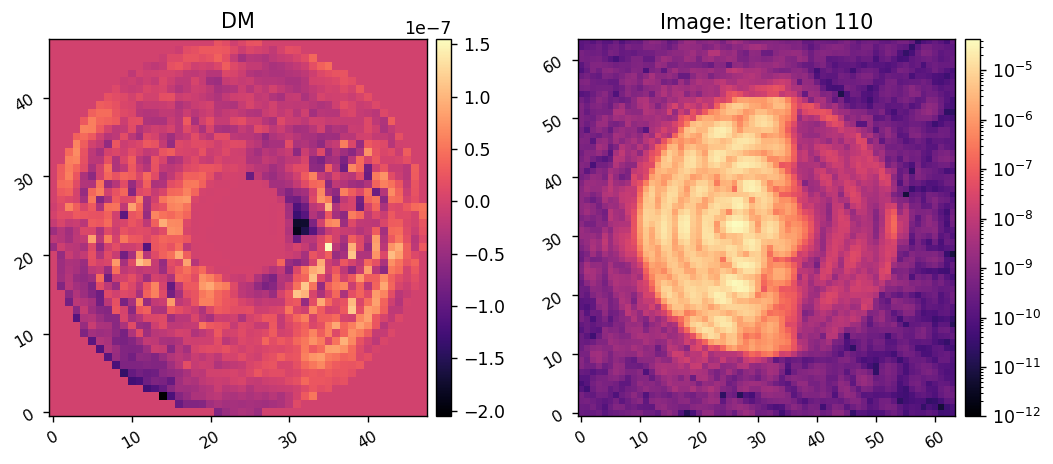

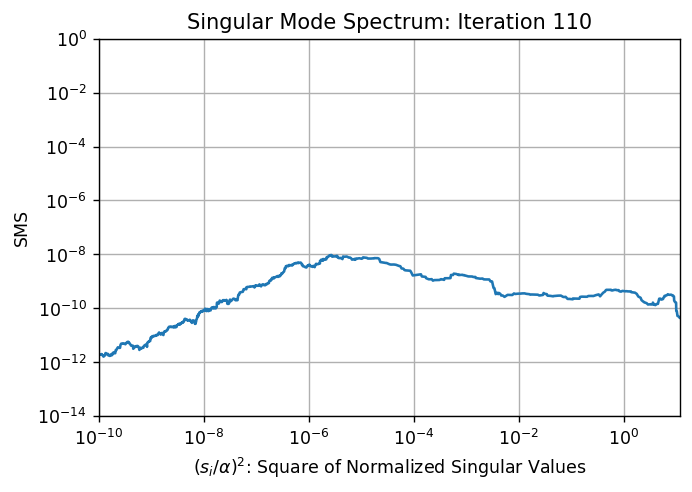

EFC completed in 210.686 sec.


In [83]:
reload(efc)
reload(utils)
sys.reset_dms()
commands1, efields1 = efc.run_efc_perfect(sys,
                                          wavelengths,
                                         jac,
                                         reg_fun,
                                         reg_conds,
                                         dh_mask, 
                                         Imax_unocc,
                                         iterations=110, 
                                         display_current=True, 
#                                           display_all=True,
                                         plot_sms=True)

# Generate probes and test PWP

Generating probe with amplitude=1.438e-08, radius=12.0, phase=0.000, offset=(8.0,8.0), with discontinuity along x axis.
Generating probe with amplitude=1.438e-08, radius=12.0, phase=1.571, offset=(8.0,8.0), with discontinuity along y axis.


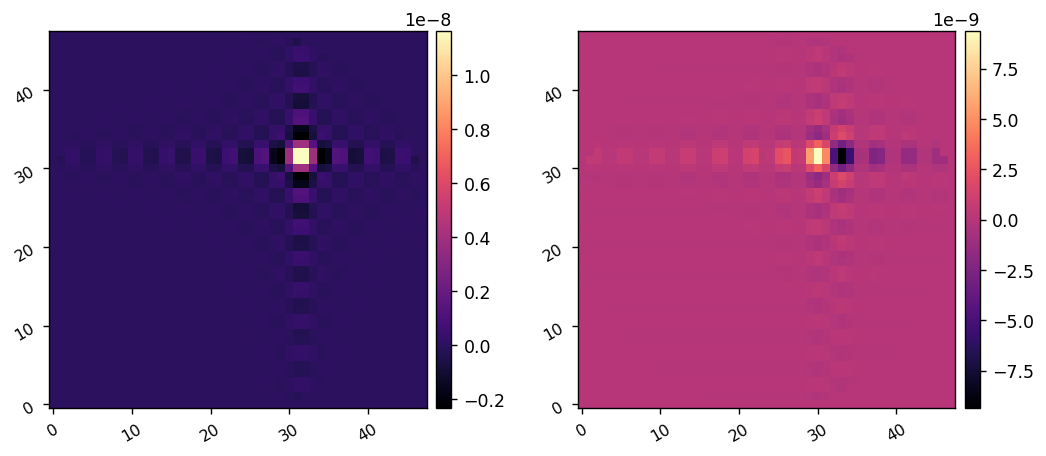

In [12]:
reload(pwp)

Npairs = 2
probe_amp = 0.025*sys.wavelength_c.value
probe_radius = 12
probe_offset = (8,8)

probes = pwp.create_sinc_probes(Npairs, Nact, sys.dm_mask, probe_amp, probe_radius, probe_offset, display=True)


In [13]:
jac.shape

(2616, 2304)

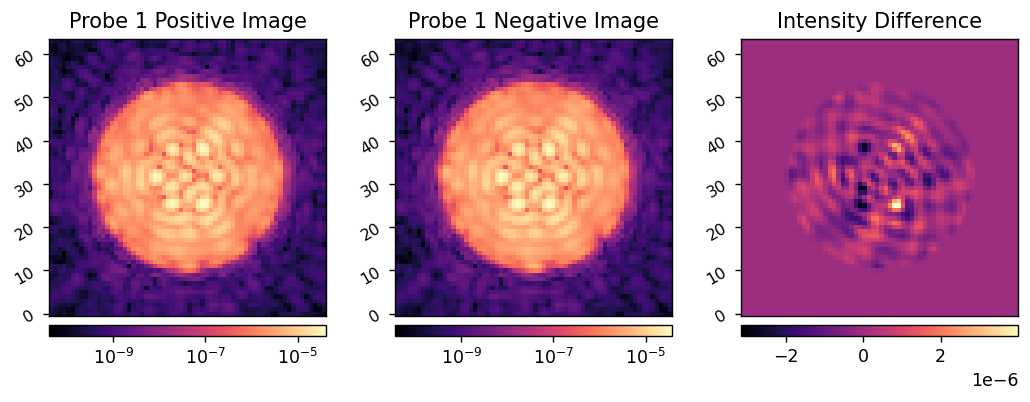

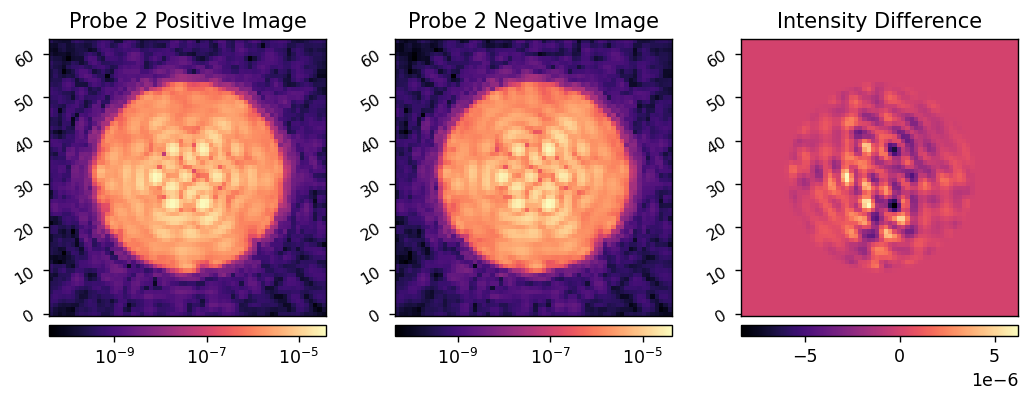

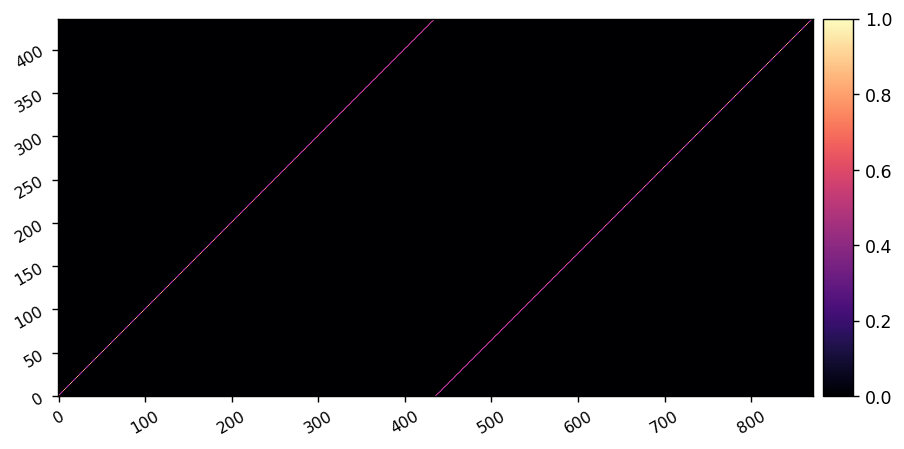

B.shape, Bfull.shape (436, 872) (436, 4360)


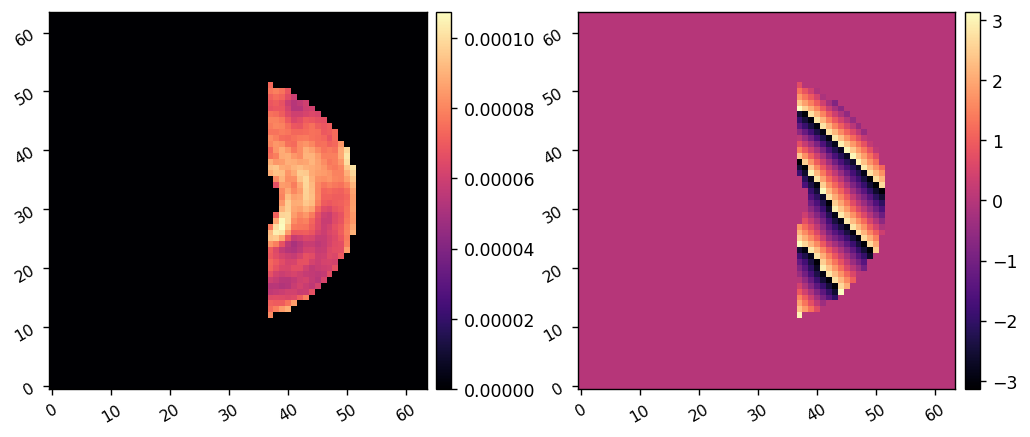

(436, 872)


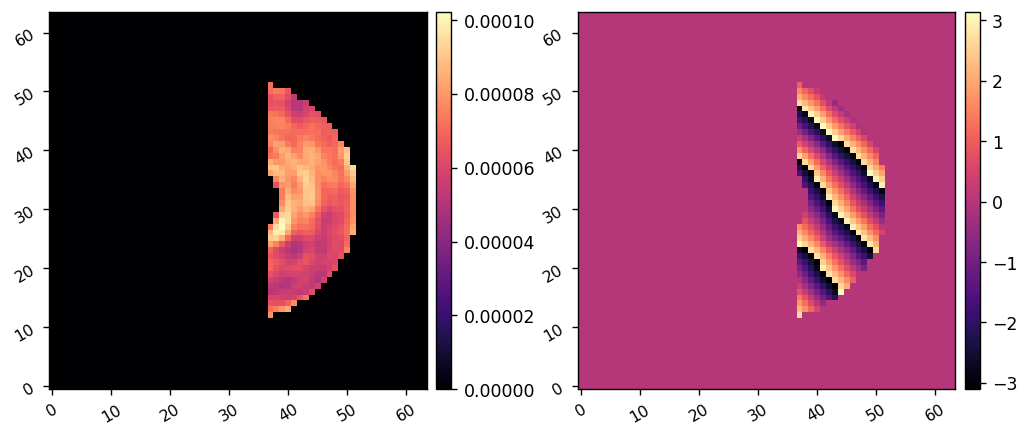

(436, 872)


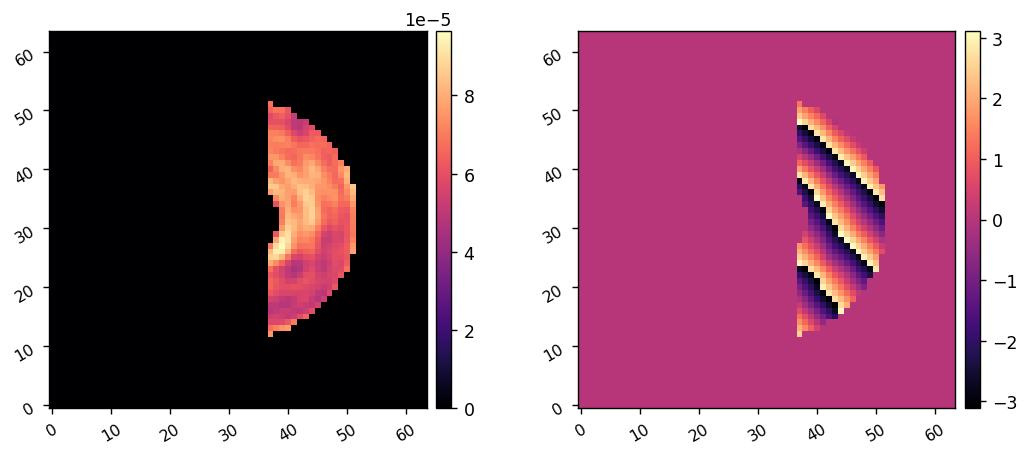

(436, 872)


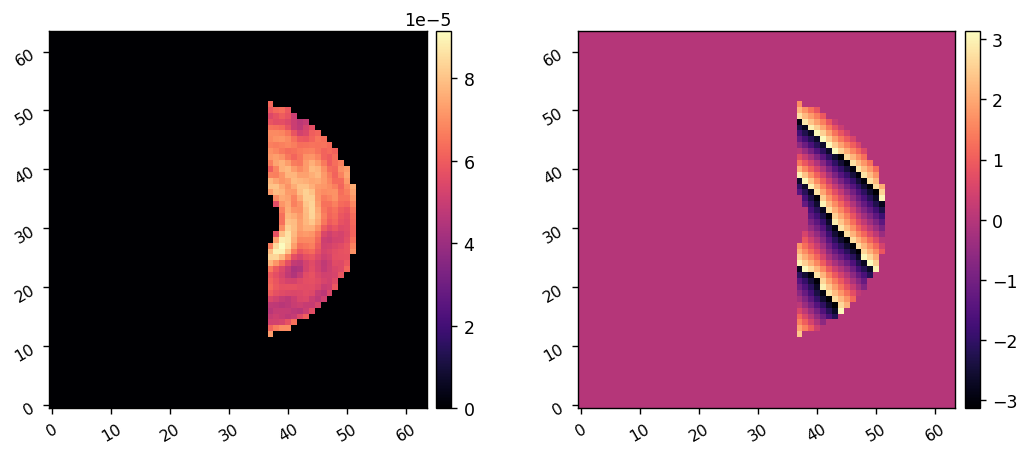

(436, 872)


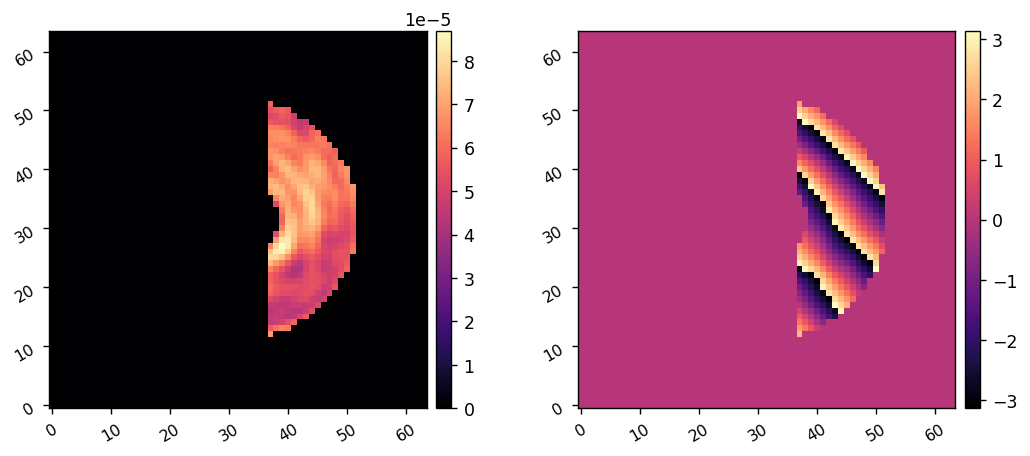

(436, 872)
Hinv.shape (436, 4360)


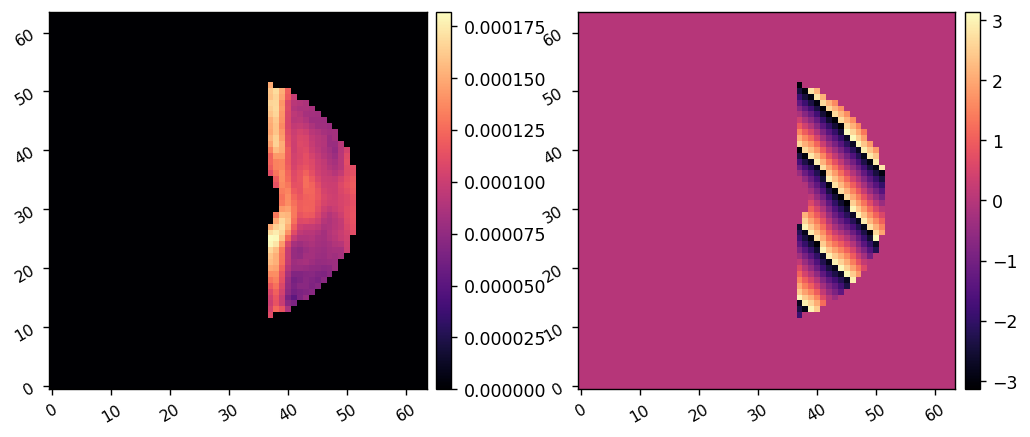

(436, 872)


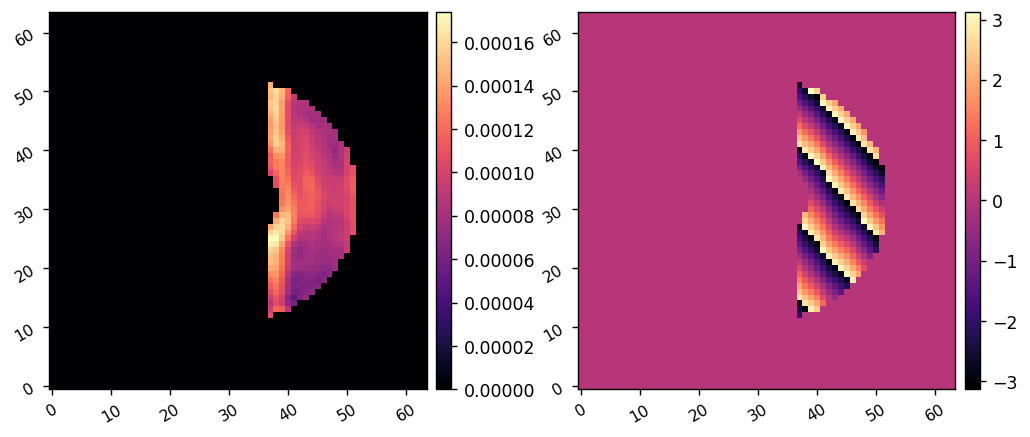

(436, 872)


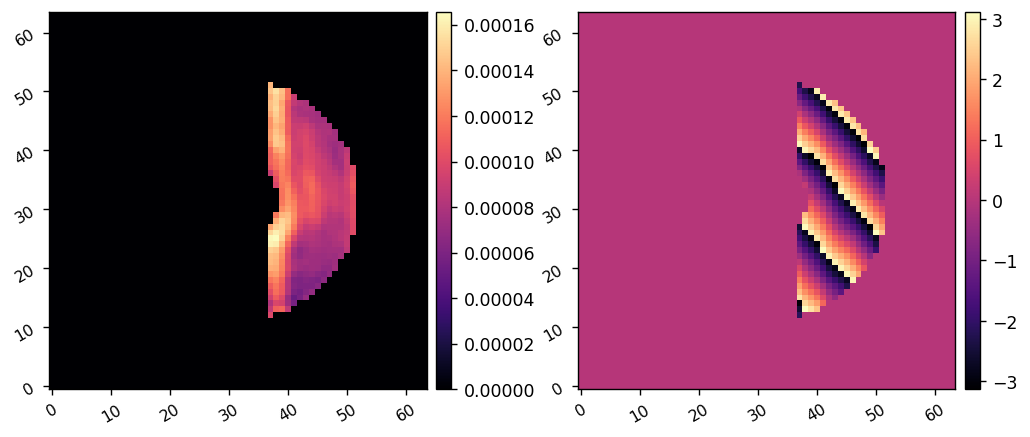

(436, 872)


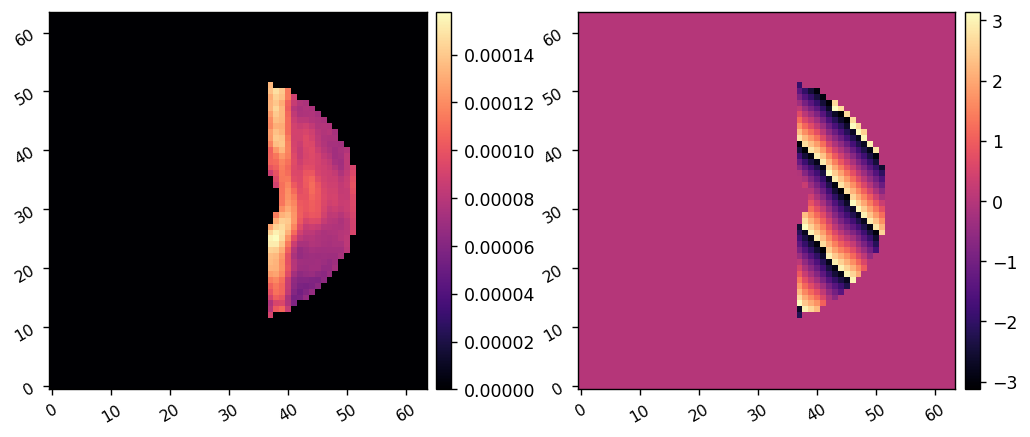

(436, 872)


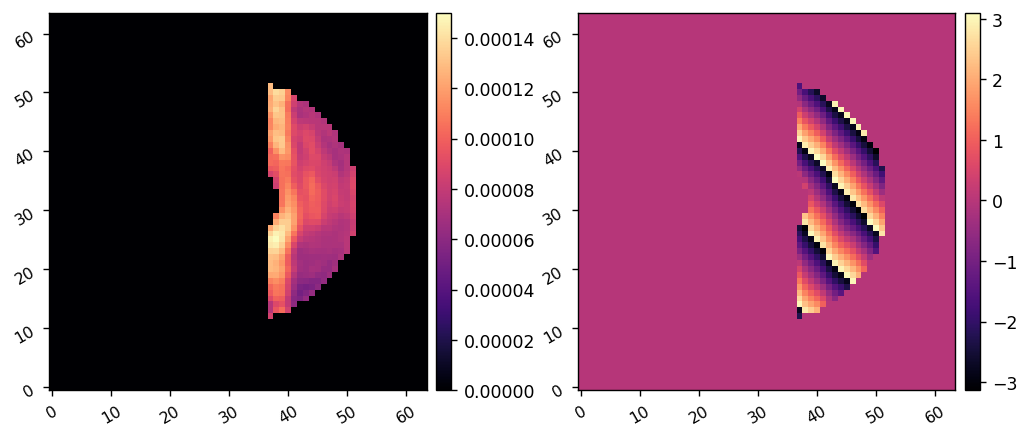

(436, 872)
Hinv.shape (872, 4360)
H.shape (4360, 872)
0 436 436 872
872 1308 1308 1744
1744 2180 2180 2616
2616 3052 3052 3488
3488 3924 3924 4360


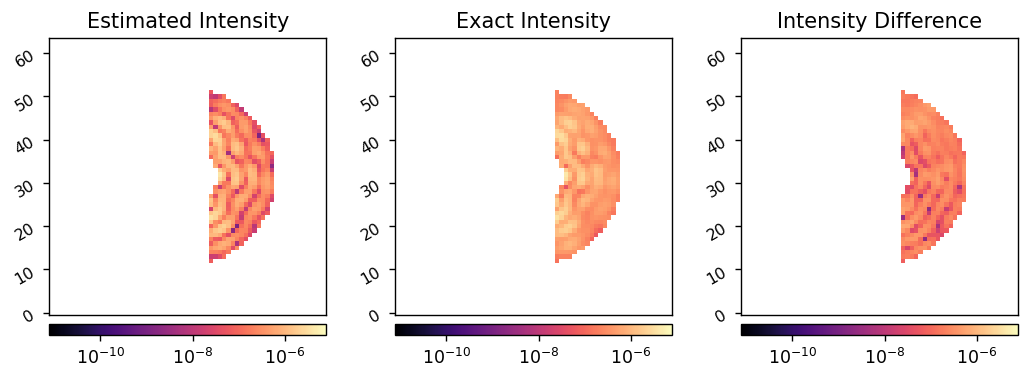

In [16]:
reload(pwp)

sys.reset_dms()
# E_est = pwp.run_pwp_broad(sys, wavelengths, probes, dh_mask, use='j', jacobian=jac/2, use_noise=False, display=True)
E_est = pwp.run_pwp_broad(sys, wavelengths, probes, dh_mask, use='m', model=sys, use_noise=False, display=True)

I_est = (np.abs(E_est)**2).sum(axis=0)/nwaves
diff = abs(ref_psf*dh_mask - I_est)

vmin = ref_psf.max()/1e6
vmax = ref_psf.max()
misc.myimshow3(I_est, 
               ref_psf*dh_mask, diff,
               'Estimated Intensity', 'Exact Intensity', 'Intensity Difference',
               lognorm1=True, lognorm2=True, lognorm3=True,
               vmin1=vmin, vmin2=vmin, vmin3=vmin,
               vmax1=vmax, vmax2=vmax, vmax3=vmax,
              )

In [7]:
nmask*nwaves

1308

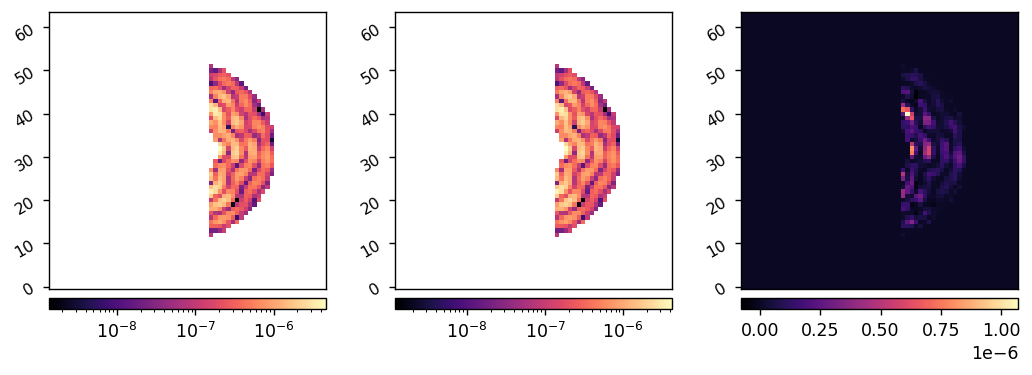

In [19]:
misc.myimshow3(np.abs(E_est[0])**2, np.abs(E_est[1])**2, np.abs(E_est[0])**2-np.abs(E_est[2])**2,
               lognorm1=True, lognorm2=True)